In [5]:
from osgeo import gdal
import numpy as np
import pandas as pd
import os
#import pandas as pd
import matplotlib.pyplot as plt
import sys
import pygmt
import rioxarray

sys.path.append('../Functions')
import TiffTools as tt

%load_ext autoreload
%autoreload 2

In [ ]:
imfsx = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/micmac/EWDispStackedEPSG4326_bidenoise_filtered.tif'
imfsy = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/micmac/NSDispStackedEPSG4326_bidenoise_filtered.tif'
imfsz = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/micmac/UDDispStackedEPSG4326_bidenoise_filtered.tif'

imfmx = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/EastdX-rioEPSG4326.tif'
imfmy = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/EastdY-rioEPSG4326.tif'
imfmz = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/EastdZ-rioEPSG4326.tif'

corrf = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/Garlock/Deformation/East/micmac/CorrelStackedEPSG4326.tif'

In [13]:
imfsx = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/EWDispStackedEPSG4326_bidenoise_filtered.tif'
imfsy = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/NSDispStackedEPSG4326_bidenoise_filtered.tif'
imfsz = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/UDDispStackedEPSG4326_bidenoise_filtered.tif'

imfmx = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdX-rioEPSG4326.tif'
imfmy = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdY-rioEPSG4326.tif'
imfmz = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdZ-rioEPSG4326.tif'

corrf = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/Garlock/Deformation/West/micmac/CorrelStackedEPSG4326.tif'

In [7]:
imfsx = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/defaultsMECdem/EWmicmacEPSG4326.tif'
imfsy = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/defaultsMECdem/NSmicmacEPSG4326.tif'
imfsz = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/defaultsMECdem/UDmicmacEPSG4326.tif'

imfmx = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdX-rioEPSG4326.tif'
imfmy = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdY-rioEPSG4326.tif'
imfmz = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdZ-rioEPSG4326.tif'

corrf = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/defaultsMECdem/CorrelmicmacEPSG4326.tif'

In [8]:
imlist = [imfsx,imfsy,imfsz]
immlist = [imfmx,imfmy,imfmz]
corrvals = gdal.Open(corrf,gdal.GA_ReadOnly)

res = []
corr = []
exp = []

for iml, imm in zip(imlist,immlist):
    im1 = gdal.Open(iml,gdal.GA_ReadOnly)
    im2 = gdal.Open(imm,gdal.GA_ReadOnly)
    im = np.sqrt((im1.GetRasterBand(1).ReadAsArray() - im2.GetRasterBand(1).ReadAsArray())**2)
    vals = im - im.mean()
    res.append(vals.flatten())
    if imfsx.__contains__('dem'):
        corr.append((corrvals.GetRasterBand(1).ReadAsArray()).flatten())
    else:
        corr.append((corrvals.GetRasterBand(1).ReadAsArray()/4).flatten())
    exp.append(im2.GetRasterBand(1).ReadAsArray())

res = np.array(res).flatten()
corr = np.array(corr).flatten()
exp = np.array(exp).flatten()

In [9]:
from scipy import stats

In [7]:
fit

LinregressResult(slope=np.float64(-0.02589716118886309), intercept=np.float64(0.020114743722914382), rvalue=np.float64(-0.038959441007593576), pvalue=np.float64(0.0), stderr=np.float64(1.871223756378202e-05), intercept_stderr=np.float64(1.490291656188939e-05))

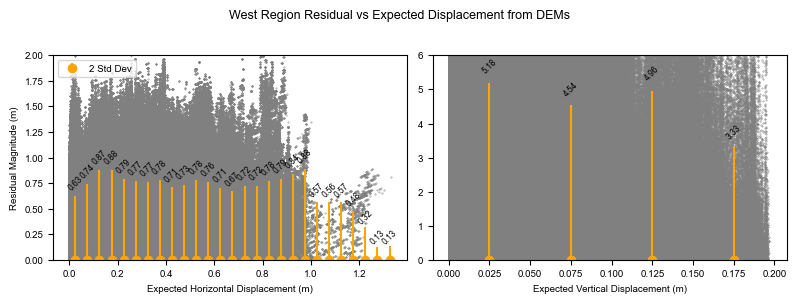

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate 2 standard deviations at 5 cm intervals
def calculate_2std_per_bin(expected, residual, bin_size=0.05):
    bins = np.arange(0, np.max(expected) + bin_size, bin_size)  # Create bins of 5 cm (0.05 m)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calculate the center of each bin
    std_values = []
    
    for i in range(len(bins) - 1):
        # Get indices of expected values falling into the current bin
        indices = np.where((expected >= bins[i]) & (expected < bins[i+1]))[0]
        # Calculate 2 standard deviations of residuals in the current bin
        if len(indices) > 0:
            std_values.append(2 * np.std(residual[indices]))
        else:
            std_values.append(np.nan)  # No data in the bin, append NaN
    
    return bin_centers, std_values

# Use Arial font for publication
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 7

# Create colorblind-friendly color
color = 'gray'  # A blue tone from colorblind-friendly palettes

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Title for the entire figure
#fig.suptitle('East Region Residual vs Expected Displacement', fontsize=9)
#fig.suptitle('West Region Residual vs Expected Displacement', fontsize=9)
fig.suptitle('West Region Residual vs Expected Displacement from DEMs', fontsize=9)

# First subplot (Horizontal Displacement)
s = int(len(res) / 3) * 0
e = int(len(res) / 3) * 2
expected_horizontal = np.absolute(exp[s:e][::10])
residual_horizontal = res[s:e][::10]
axs[0].scatter(expected_horizontal, residual_horizontal, s=0.1, color=color)

# Calculate and plot 2 standard deviations
bin_centers, std_values = calculate_2std_per_bin(expected_horizontal, residual_horizontal)
axs[0].errorbar(bin_centers, np.zeros_like(bin_centers), yerr=std_values, fmt='o', color='orange', label='2 Std Dev')

# Add labels above the markers for the standard deviation
for i, (center, std) in enumerate(zip(bin_centers, std_values)):
    if not np.isnan(std):
        axs[0].text(center, std * 1.05, f'{std:.2f}', ha='center', va='bottom', rotation=45, fontsize=6)

axs[0].set_ylim(0, 2)
axs[0].set_xlabel('Expected Horizontal Displacement (m)')
axs[0].set_ylabel('Residual Magnitude (m)')
axs[0].legend(loc='upper left')

# Second subplot (Vertical Displacement)
s = int(len(res) / 3) * 2
e = int(len(res) / 3) * 3
expected_vertical = np.absolute(exp[s:e][::10])
residual_vertical = res[s:e][::10]
axs[1].scatter(expected_vertical, residual_vertical, s=0.1, color=color)

# Calculate and plot 2 standard deviations
bin_centers, std_values = calculate_2std_per_bin(expected_vertical, residual_vertical)
axs[1].errorbar(bin_centers, np.zeros_like(bin_centers), yerr=std_values, fmt='o', color='orange', label='2 Std Dev')

# Add labels above the markers for the standard deviation
for i, (center, std) in enumerate(zip(bin_centers, std_values)):
    if not np.isnan(std):
        axs[1].text(center, std * 1.05, f'{std:.2f}', ha='center', va='bottom', rotation=45, fontsize=6)

axs[1].set_ylim(0, 6)
axs[1].set_xlabel('Expected Vertical Displacement (m)')
axs[1].set_ylabel('')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
#plt.savefig(f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/WestResidualVsExpectedWSTD.png',dpi=300)
plt.savefig(f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/WestDEMResidualVsExpectedWSTD.png',dpi=300)
#plt.savefig(f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/EastResidualVsExpectedWSTD.png',dpi=300)
plt.show()

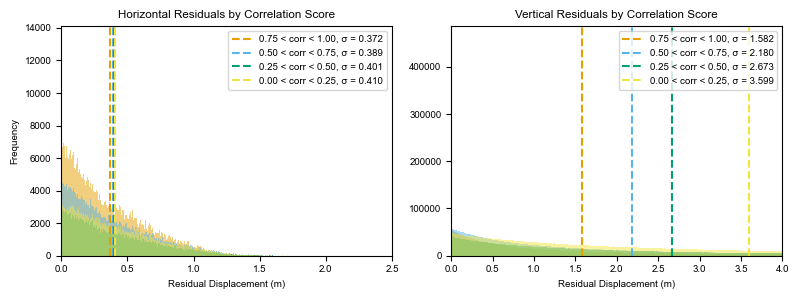

Standard Deviation for Horizontal 0.75 < corr < 1.00: 0.37205
Standard Deviation for Vertical 0.75 < corr < 1.00: 1.58184
Standard Deviation for Horizontal 0.50 < corr < 0.75: 0.38918
Standard Deviation for Vertical 0.50 < corr < 0.75: 2.18031
Standard Deviation for Horizontal 0.25 < corr < 0.50: 0.40099
Standard Deviation for Vertical 0.25 < corr < 0.50: 2.67296
Standard Deviation for Horizontal 0.00 < corr < 0.25: 0.40967
Standard Deviation for Vertical 0.00 < corr < 0.25: 3.59898


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use Arial font for publication
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 7

# Create colorblind-friendly colors
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']  # Colorblind-friendly palette

# Create figure and subplots for horizontal and vertical residuals
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Define correlation bins
corr_bins = [(3/4, 4/4), (2/4, 3/4), (1/4, 2/4), (0/4, 1/4)]
corr_bins = [(3/4, 4/4), (2/4, 3/4), (1/4, 2/4), (0/4, 1/4)]

# Set ranges for horizontal and vertical residuals
# Horizontal residuals
s_horz = int(len(res) / 3) * 0
e_horz = int(len(res) / 3) * 2

# Vertical residuals
s_vert = int(len(res) / 3) * 2
e_vert = int(len(res) / 3) * 3

# First subplot (Horizontal)
labels_horz = []  # To store labels with standard deviations for the horizontal plot
for i, (lower, upper) in enumerate(corr_bins):
    subset = res[s_horz:e_horz][((corr[s_horz:e_horz] > lower) & (corr[s_horz:e_horz] < upper))]
    std_val = np.std(subset)  # Calculate standard deviation

    # Plot histogram and vertical line
    axs[0].hist(subset, bins=100000, color=colors[i], alpha=0.5)
    axs[0].axvline(std_val, color=colors[i], linestyle='--')

    # Append label with correlation range and standard deviation
    labels_horz.append(f'{lower:.2f} < corr < {upper:.2f}, σ = {std_val:.3f}')

# Set labels and title for horizontal residuals
axs[0].set_title('Horizontal Residuals by Correlation Score')
axs[0].set_xlim(0, 2.5)
axs[0].set_xlabel('Residual Displacement (m)')
axs[0].set_ylabel('Frequency')

# Add legend for horizontal residuals
axs[0].legend(labels_horz, loc='upper right')

# Second subplot (Vertical)
labels_vert = []  # To store labels with standard deviations for the vertical plot
for i, (lower, upper) in enumerate(corr_bins):
    subset = res[s_vert:e_vert][((corr[s_vert:e_vert] > lower) & (corr[s_vert:e_vert] < upper))]
    std_val = np.std(subset)  # Calculate standard deviation

    # Plot histogram and vertical line
    axs[1].hist(subset, bins=100000, color=colors[i], alpha=0.5)
    axs[1].axvline(std_val, color=colors[i], linestyle='--')

    # Append label with correlation range and standard deviation
    labels_vert.append(f'{lower:.2f} < corr < {upper:.2f}, σ = {std_val:.3f}')

# Set labels and title for vertical residuals
axs[1].set_title('Vertical Residuals by Correlation Score')
axs[1].set_xlim(0, 4)
axs[1].set_xlabel('Residual Displacement (m)')

# Add legend for vertical residuals
axs[1].legend(labels_vert, loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure to a file
#plt.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/WestCorrelHist-allDirections.png', dpi=300)
plt.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/WestDEMCorrelHist-allDirections.png', dpi=300)

#plt.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/EastCorrelHist-allDirections.png', dpi=300)

# Show the plot
plt.show()

# Print standard deviations for reference
for i, (lower, upper) in enumerate(corr_bins):
    std_horz = np.std(res[s_horz:e_horz][((corr[s_horz:e_horz] > lower) & (corr[s_horz:e_horz] < upper))])
    std_vert = np.std(res[s_vert:e_vert][((corr[s_vert:e_vert] > lower) & (corr[s_vert:e_vert] < upper))])
    print(f'Standard Deviation for Horizontal {lower:.2f} < corr < {upper:.2f}: {std_horz:.5f}')
    print(f'Standard Deviation for Vertical {lower:.2f} < corr < {upper:.2f}: {std_vert:.5f}')




## Vegetation.. duh duh duhhhhhhh

In [19]:
from osgeo import gdal
import numpy as np

import matplotlib.pyplot as plt

In [50]:
imfsxe = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/micmac/EWDispStackedEPSG4326_bidenoise_filtered.tif'
imfsye = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/micmac/NSDispStackedEPSG4326_bidenoise_filtered.tif'
imfsze = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/micmac/UDDispStackedEPSG4326_bidenoise_filtered.tif'

imfmxe = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/EastdX-rioEPSG4326.tif'
imfmye = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/EastdY-rioEPSG4326.tif'
imfmze = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/East/EastdZ-rio-x4EPSG4326.tif'

corrfe = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/Garlock/Deformation/East/micmac/CorrelStackedEPSG4326.tif'

In [49]:
imfsxw = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/EWDispStackedEPSG4326_bidenoise_filtered.tif'
imfsyw = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/NSDispStackedEPSG4326_bidenoise_filtered.tif'
imfszw = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/UDDispStackedEPSG4326_bidenoise_filtered.tif'

imfmxw = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdX-rioEPSG4326.tif'
imfmyw = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdY-rioEPSG4326.tif'
imfmzw = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdZ-rio-x4EPSG4326.tif'

corrfw = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/Garlock/Deformation/West/micmac/CorrelStackedEPSG4326.tif'

In [ ]:
imfsxwdem = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/defaultsMECdem/EWDispStackedEPSG4326_bidenoise_filtered.tif'
imfsywdem = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/NSDispStackedEPSG4326_bidenoise_filtered.tif'
imfszwdem = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/micmac/UDDispStackedEPSG4326_bidenoise_filtered.tif'
fix
imfmx = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdX-rioEPSG4326.tif'
imfmy = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdY-rioEPSG4326.tif'
imfmz = '/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdZ-rio-x4EPSG4326.tif'

corrf = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/Garlock/Deformation/West/micmac/CorrelStackedEPSG4326.tif'

In [6]:
# Warp the ESA landcover maps to 0.5 m res in the region of interest for East and West
#!gdalwarp -t_srs EPSG:4326 -overwrite -te -118.80343 34.84839 -118.6959 34.92569  -tr 4.987476808905901e-06 -4.987418543131882e-06 -r near -of GTiff /Volumes/Extreme\ Pro/Projects/Garlock/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N33W117_Map/ESA_WorldCover_10m_2021_v200_N33W117_Map.tif /Volumes/Extreme\ Pro/Projects/Garlock/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N33W120_Map/ESA_WorldCover_10m_2021_v200_N33W120_Map.tif /Volumes/Extreme\ Pro/Projects/Garlock/ESA_WORLDCOVER_10M_2021_V200/ESA_WorldCover_clippedGarlockWestAOI_10m.tif
#!gdalwarp -t_srs EPSG:4326 -overwrite -te -117.0256160 35.559928 -116.899990 35.6439349 -r near -tr 0.000005012808747 -0.000005012643953 -of GTiff /Volumes/Extreme\ Pro/Projects/Garlock/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N33W117_Map/ESA_WorldCover_10m_2021_v200_N33W117_Map.tif /Volumes/Extreme\ Pro/Projects/Garlock/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N33W120_Map/ESA_WorldCover_10m_2021_v200_N33W120_Map.tif /Volumes/Extreme\ Pro/Projects/Garlock/ESA_WORLDCOVER_10M_2021_V200/ESA_WorldCover_clippedGarlockEastAOI_10m.tif
covere = '/Volumes/Extreme Pro/Projects/Garlock/ESA_WORLDCOVER_10M_2021_V200/ESA_WorldCover_clippedGarlockEastAOI_10m.tif'
coverw = '/Volumes/Extreme Pro/Projects/Garlock/ESA_WORLDCOVER_10M_2021_V200/ESA_WorldCover_clippedGarlockWestAOI_10m.tif'


In [73]:
imhlist = [imfsxw,imfsyw,imfsxe,imfsye]
immhlist = [imfmxw,imfmyw,imfmxe,imfmye]
covlist = [coverw,coverw,covere,covere]
res = []
exp = []
cov = []

for iml, imm, cm in zip(imhlist,immhlist,covlist):
    im1 = gdal.Open(iml,gdal.GA_ReadOnly)
    im2 = gdal.Open(imm,gdal.GA_ReadOnly)
    cm = gdal.Open(cm,gdal.GA_ReadOnly)
    im = np.sqrt((im1.GetRasterBand(1).ReadAsArray() - im2.GetRasterBand(1).ReadAsArray())**2)
    vals = im - im.mean()
    res.append(vals.flatten())
    exp.append(im2.GetRasterBand(1).ReadAsArray().flatten())
    cov.append(cm.GetRasterBand(1).ReadAsArray().flatten())

res = np.hstack([res[0],res[1],res[2],res[3]])
exp = np.hstack([exp[0],exp[1],exp[2],exp[3]])
cov = np.hstack([cov[0],cov[1],cov[2],cov[3]])

271403636
132557438
420648062
37036
683651940
13366


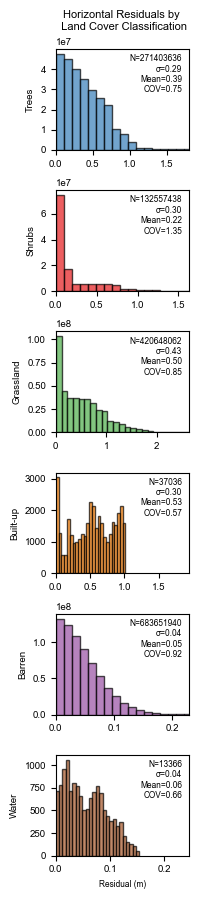

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set font for publication
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 7

# Define colorblind-friendly colors
colors = [
    '#377eb8',  # Blue
    '#e41a1c',  # Red
    '#4daf4a',  # Green
    '#ff7f00',  # Orange
    '#984ea3',  # Purple
    '#a65628',  # Brown
]

# Map of ESA WorldCover 2021 classes
landcover_names = {
    10: 'Trees',
    20: 'Shrubs',
    30: 'Grassland',
    50: 'Built-up',
    60: 'Barren', 
    80: 'Water'
}

# Create figure and subplots
fig, axs = plt.subplots(6,1, figsize=(2,9))# sharey=True)  # Adjust width as needed for 6 subplots

# Plot histograms and add land cover labels for each subset
for i, lc_class in enumerate(np.unique(cov)):
    subset = np.absolute(res[cov == lc_class])
    print(len(subset))

    # Calculate standard deviation and coefficient of variation
    std_dev = np.std(subset)
    mean_val = np.mean(subset)
    cov_val = std_dev / mean_val if mean_val != 0 else 0

    # Plot histogram and set axis limits
    # Trim outliers for plotting, to fix axes issues)
    axs[i].hist(subset[subset< np.percentile(subset,95)*3], bins=25, color=colors[i], alpha=0.7,edgecolor='black')
    axs[i].set_ylabel(landcover_names.get(lc_class, f'Class {lc_class}'), fontsize=7)
    axs[i].set_xlim([0, np.percentile(subset,95)*2])

    # Annotation for standard deviation and COV in the plot whitespace
    axs[i].text(0.95, 0.95, f'N={int(len(subset))}\nσ={std_dev:.2f}\nMean={mean_val:.2f}\nCOV={cov_val:.2f}',
                transform=axs[i].transAxes, ha='right', va='top', fontsize=6,
                bbox=dict(facecolor='white', edgecolor='none', pad=2.0))

    # Label x-axis
    if i == 5:
        axs[i].set_xlabel('Residual (m)', fontsize=6)

# General settings for y-axis and layout
axs[0].set_title('Horizontal Residuals by \n Land Cover Classification', fontsize=8)
plt.tight_layout(w_pad=1)  # Compact the subplots with minimal whitespace
plt.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/HorizontalLandCoverHistogramResidualsDEMs.png', dpi=300)
#plt.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/HorizontalLandCoverHistogramResiduals.png', dpi=300)
plt.show()


In [48]:
imm

'/Volumes/Extreme Pro/Projects/Garlock/Deformation/West/WestdZ-riox4EPSG4326.tif'

In [78]:
imvlist = [imfszw,imfsze]
immvlist = [imfmzw,imfmze]
covlist = [coverw,covere]
res = []
exp = []
cov = []

for iml, imm, cm in zip(imvlist,immvlist,covlist):
    im1 = gdal.Open(iml,gdal.GA_ReadOnly)
    im2 = gdal.Open(imm,gdal.GA_ReadOnly)
    cm = gdal.Open(cm,gdal.GA_ReadOnly)
    im = np.sqrt((im1.GetRasterBand(1).ReadAsArray() - im2.GetRasterBand(1).ReadAsArray())**2)
    vals = im - im.mean()
    res.append(vals.flatten())
    exp.append(im2.GetRasterBand(1).ReadAsArray().flatten())
    cov.append(cm.GetRasterBand(1).ReadAsArray().flatten())

res = np.hstack([res[0],res[1]])
exp = np.hstack([exp[0],exp[1]])
cov = np.hstack([cov[0],cov[1]])

135701818
66278719
210324031
18518
341825970
6683


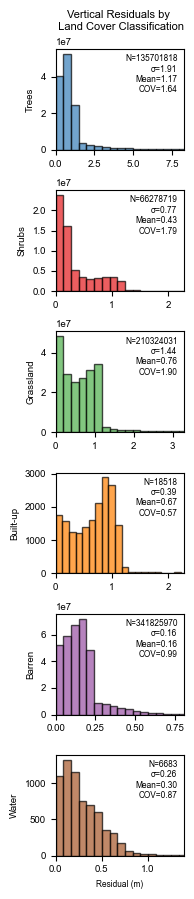

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set font for publication
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 7

# Define colorblind-friendly colors
colors = [
    '#377eb8',  # Blue
    '#e41a1c',  # Red
    '#4daf4a',  # Green
    '#ff7f00',  # Orange
    '#984ea3',  # Purple
    '#a65628',  # Brown
]

# Map of ESA WorldCover 2021 classes
landcover_names = {
    10: 'Trees',
    20: 'Shrubs',
    30: 'Grassland',
    50: 'Built-up',
    60: 'Barren', 
    80: 'Water'
}

# Create figure and subplots
fig, axs = plt.subplots(6,1, figsize=(2,9))# sharey=True)  # Adjust width as needed for 6 subplots

# Plot histograms and add land cover labels for each subset
for i, lc_class in enumerate(np.unique(cov)):
    subset = np.absolute(res[cov == lc_class])
    print(len(subset))

    # Calculate standard deviation and coefficient of variation
    std_dev = np.std(subset)
    mean_val = np.mean(subset)
    cov_val = std_dev / mean_val if mean_val != 0 else 0

    # Plot histogram and set axis limits
    # Trim outliers for plotting, to fix axes issues)
    axs[i].hist(subset[subset< np.percentile(subset,95)*3], bins=25, color=colors[i], alpha=0.7,edgecolor='black')
    axs[i].set_ylabel(landcover_names.get(lc_class, f'Class {lc_class}'), fontsize=7)
    axs[i].set_xlim([0, np.percentile(subset,95)*2])

    # Annotation for standard deviation and COV in the plot whitespace
    axs[i].text(0.95, 0.95, f'N={int(len(subset))}\nσ={std_dev:.2f}\nMean={mean_val:.2f}\nCOV={cov_val:.2f}',
                transform=axs[i].transAxes, ha='right', va='top', fontsize=6,
                bbox=dict(facecolor='white', edgecolor='none', pad=2.0))

    # Label x-axis
    if i == 5:
        axs[i].set_xlabel('Residual (m)', fontsize=6)

# General settings for y-axis and layout
axs[0].set_title('Vertical Residuals by \n Land Cover Classification', fontsize=8)
plt.tight_layout(w_pad=1)  # Compact the subplots with minimal whitespace
plt.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/VerticalLandCoverHistogramResidualsDEMs.png', dpi=300)
#plt.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Manuscripts/Garlock/Figures/VerticalLandCoverHistogramResiduals.png', dpi=300)
plt.show()

In [60]:
subset = np.absolute(res[cov == 20])


In [64]:
np.min(subset), np.max(subset), np.percentile(subset,75)


(np.float64(1.1308467606774286e-08),
 np.float64(238.71179124668504),
 np.float64(0.5974020417932211))

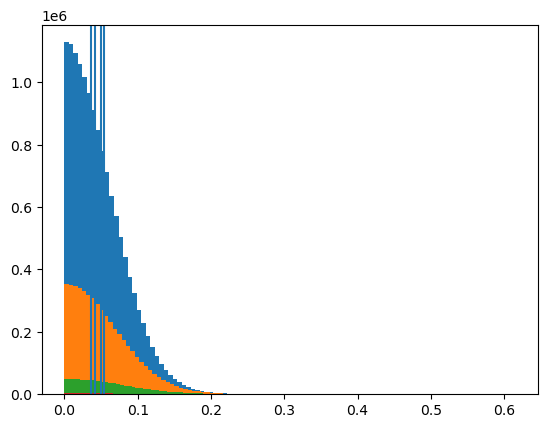

In [49]:
plt.hist(rmse.flatten()[((cdata.flatten()>3)& (cdata.flatten()<4))],bins=100)
plt.hist(rmse.flatten()[((cdata.flatten()>2)& (cdata.flatten()<3))],bins=100)
plt.hist(rmse.flatten()[((cdata.flatten()>1)& (cdata.flatten()<2))],bins=100)
plt.hist(rmse.flatten()[((cdata.flatten()>0)& (cdata.flatten()<1))],bins=100)
plt.axvline(np.std(rmse.flatten()[((cdata.flatten()>3)& (cdata.flatten()<4))]))
plt.axvline(np.std(rmse.flatten()[((cdata.flatten()>2)& (cdata.flatten()<3))]))
plt.axvline(np.std(rmse.flatten()[((cdata.flatten()>1)& (cdata.flatten()<2))]))
plt.axvline(np.std(rmse.flatten()[((cdata.flatten()>0)& (cdata.flatten()<1))]))

(array([1.491174e+06, 1.481649e+06, 1.447697e+06, 1.408284e+06,
        1.356087e+06, 1.289805e+06, 1.224511e+06, 1.139280e+06,
        1.054498e+06, 9.654230e+05, 8.692710e+05, 7.804480e+05,
        6.972620e+05, 6.096960e+05, 5.287310e+05, 4.569150e+05,
        3.850460e+05, 3.271480e+05, 2.716110e+05, 2.259920e+05,
        1.859140e+05, 1.506310e+05, 1.212210e+05, 9.970000e+04,
        7.994200e+04, 6.247500e+04, 4.852700e+04, 3.804900e+04,
        2.922300e+04, 2.287200e+04, 1.784800e+04, 1.433100e+04,
        1.116400e+04, 8.535000e+03, 6.569000e+03, 5.323000e+03,
        4.323000e+03, 3.528000e+03, 2.635000e+03, 2.243000e+03,
        1.903000e+03, 1.508000e+03, 1.413000e+03, 1.310000e+03,
        1.082000e+03, 7.040000e+02, 5.990000e+02, 5.370000e+02,
        5.510000e+02, 4.520000e+02, 3.430000e+02, 2.930000e+02,
        2.810000e+02, 2.370000e+02, 2.110000e+02, 1.850000e+02,
        1.610000e+02, 1.790000e+02, 1.560000e+02, 1.500000e+02,
        9.900000e+01, 8.200000e+01, 8.30

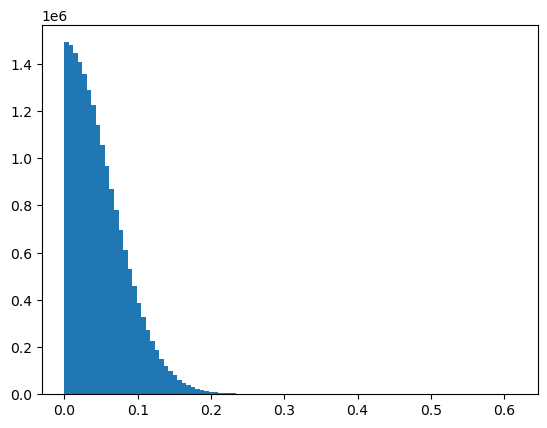

In [44]:
plt.hist(rmse.flatten()[cdata.flatten()>2],bins=100)

In [ ]:
#need to figure out how to handle edge pixels - branch out only in one direction? Or shift i?

In [22]:
# Create an averaging test. How many pixels does it take to get to the center of a tootsie pop?
# Start with a pixel, determine when it achieves deformation within 1/10th pixel size. 
# If it is not within that measurment, increase buffer zone around the pixel until the mean is within 1/10th. 
# instead of working with the differences in each step, lets work with the residual maps to start with. 
res = np.absolute(mxdata-sxdata) # residual map
pixres = 0.5 # pixel resolution
avg_size = np.zeros(np.shape(res))# initialize the averaging size matrix - will contain the dim needed for that pixel to achieve desired 1/10th pix resolution difference.

for xi in range(0,np.shape(res)[1]): # column is x
    for yi in range(0,np.shape(res)[0]): # row is y
        poi = res[yi,xi] # pixel of interest
        if poi <= pixres*0.1:
            avg_size[yi,xi] = 1
        else: # else add buffer
            i = 1
            while poi >= pixres*0.1: # stop at 30 meters, becuase at that point we have acieved pixel offset tracking and sentinel (?) resolutions
                poi = np.nanmean(res[yi-i:yi+i,xi-i:xi+i])
                if i > int(30/pixres/2):
                    avg_size[yi,xi] = np.nan
                    break
                else:
                    avg_size[yi,xi] = ((yi+i)-(yi-i))*((xi+i)-(xi-i))
                i += 1





/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_10827/133243616.py:17: RuntimeWarning: Mean of empty slice
  poi = np.nanmean(res[yi-i:yi+i,xi-i:xi+i])


In [1]:
plt.imshow(np.sqrt(avg_size),vmin=0,vmax=10)
plt.colorbar()

NameError: name 'plt' is not defined

(array([[4000.,    0.,    0., ...,    0.,    0.,    0.],
        [4000.,    0.,    0., ...,    0.,    0.,    0.],
        [4000.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [2160.,  131.,  107., ...,   30.,   38.,   20.],
        [2266.,  133.,   88., ...,   26.,   33.,   29.],
        [2286.,  136.,  105., ...,   20.,   37.,   23.]]),
 array([ 1. ,  6.9, 12.8, 18.7, 24.6, 30.5, 36.4, 42.3, 48.2, 54.1, 60. ]),
 <a list of 5000 BarContainer objects>)

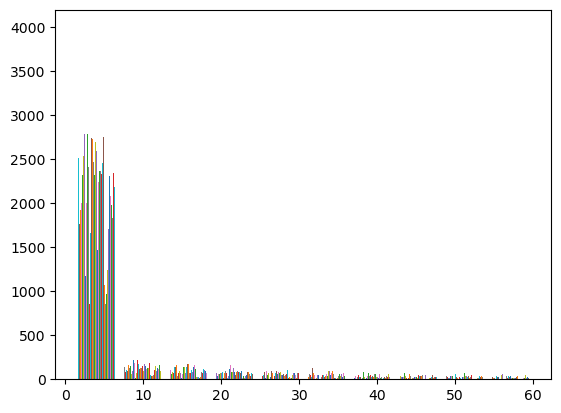

In [30]:
plt.hist(np.sqrt(avg_size))

(array([[3.919e+03, 7.100e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [3.919e+03, 7.100e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [3.919e+03, 7.100e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [3.960e+03, 3.000e+01, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [3.960e+03, 3.000e+01, 8.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [3.965e+03, 2.800e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([5.77949910e-10, 2.02108001e-01, 4.04216000e-01, 6.06324000e-01,
        8.08432000e-01, 1.01054000e+00, 1.21264800e+00, 1.41475600e+00,
        1.61686400e+00, 1.81897200e+00, 2.02108000e+00]),
 <a list of 5000 BarContainer objects>)

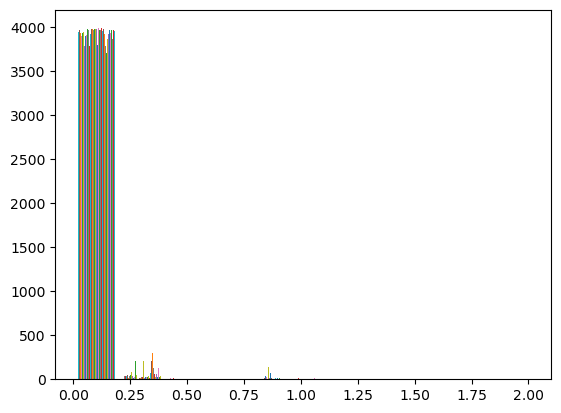

In [36]:
plt.hist(rmse)

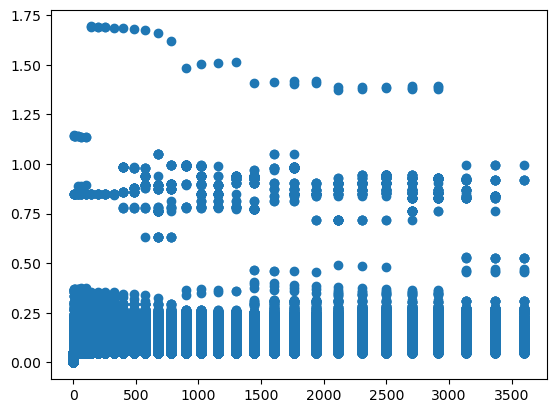

In [35]:
plt.scatter(avg_size.flatten(),rmse.flatten())


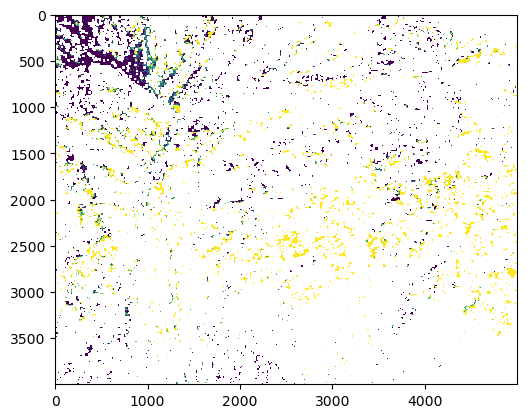

In [205]:
plt.imshow(szd_masked,vmin=-0.1,vmax=0.1)

In [196]:
0.9*4

3.6

In [203]:
cmask = (cdata > 3)
szd_masked = szdata.copy()
szd_masked[~cmask] = np.nan

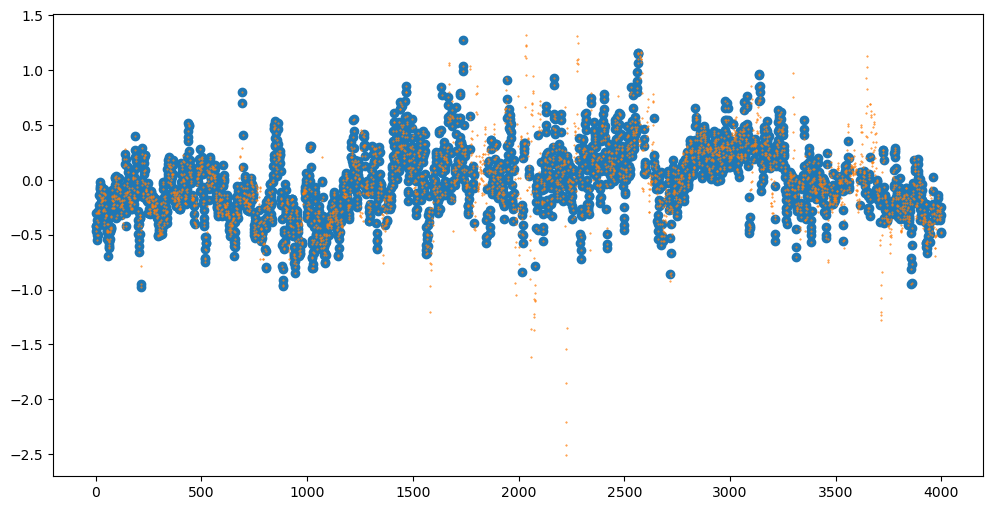

In [204]:
plt.figure(figsize=(12,6))
plt.scatter([np.arange(np.shape(szd_masked)[0])],szd_masked[:,50])
plt.scatter([np.arange(np.shape(szdata)[0])],szdata[:,50],s=0.2)


In [179]:
plt.figure(figsize=(12,6))
plt.scatter([np.arange(np.shape(szd_masked)[0])],szd_masked[:,50])

array([0.2447731 , 0.1507964 , 0.1507964 , ..., 0.36648663, 0.31600645,
       0.20407586])